In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
retail= pd.read_csv('retail_clean.csv')

In [3]:
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [4]:
retail['InvoiceDate']= pd.to_datetime(retail['InvoiceDate'])
retail['date']= retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date']= pd.to_datetime(retail['date'])

In [5]:
max_date= retail['date'].max()

In [6]:
retail.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date'],
      dtype='object')

In [7]:
customers_recency = retail.groupby('Customer ID').agg(last_date = ('date', 'max')).reset_index()

In [8]:
customers_recency

,Customer ID,last_date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
5876,18283.0,2011-12-06
5877,18284.0,2010-10-04
5878,18285.0,2010-02-17
5879,18286.0,2010-08-20


In [9]:
customers_recency['recency'] = max_date - customers_recency['last_date']
customers_recency

,Customer ID,last_date,recency
0,12346.0,2011-01-18,325 days
1,12347.0,2011-12-07,2 days
2,12348.0,2011-09-25,75 days
3,12349.0,2011-11-21,18 days
4,12350.0,2011-02-02,310 days
...,...,...,...
5876,18283.0,2011-12-06,3 days
5877,18284.0,2010-10-04,431 days
5878,18285.0,2010-02-17,660 days
5879,18286.0,2010-08-20,476 days


In [10]:
customers_recency['recency']=customers_recency['recency'].astype('string').str.replace('days', '').astype(int)

In [11]:
freq=retail.groupby('Customer ID').date.count().reset_index

In [12]:
freq= retail.groupby('Customer ID').date.count().reset_index()
freq.columns= ['Customer ID','frequency']

In [13]:
freq

,Customer ID,frequency
0,12346.0,34
1,12347.0,222
2,12348.0,51
3,12349.0,175
4,12350.0,17
...,...,...
5876,18283.0,938
5877,18284.0,28
5878,18285.0,12
5879,18286.0,67


In [14]:
monet_1 = retail.groupby(['Customer ID', 'Invoice']).agg(revenue = ('Revenue', 'sum')).reset_index()

In [15]:
monet_1

,Customer ID,Invoice,revenue
0,12346.0,491725,45.00
1,12346.0,491742,22.50
2,12346.0,491744,22.50
3,12346.0,492718,22.50
4,12346.0,492722,1.00
...,...,...,...
36970,18287.0,523290,30.60
36971,18287.0,534346,381.50
36972,18287.0,554065,765.28
36973,18287.0,570715,1001.32


In [16]:
monet_2 = monet_1.groupby('Customer ID').agg(monetary = ('revenue', 'mean')).reset_index()

In [54]:
monet_2['rank_monet']=monet_2['monetary'].rank(pct=True)

In [18]:
customers_recency['rank_recency']=customers_recency['recency'].rank(pct=True)

In [19]:
customers_recency

,Customer ID,last_date,recency,rank_recency
0,12346.0,2011-01-18,325,0.710338
1,12347.0,2011-12-07,2,0.031202
2,12348.0,2011-09-25,75,0.458085
3,12349.0,2011-11-21,18,0.192229
4,12350.0,2011-02-02,310,0.699286
...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846
5877,18284.0,2010-10-04,431,0.831406
5878,18285.0,2010-02-17,660,0.967267
5879,18286.0,2010-08-20,476,0.868730


In [21]:
freq['freq_ranking']=freq['frequency'].rank(ascending=False, pct=True)

In [22]:
freq

,Customer ID,frequency,freq_ranking
0,12346.0,34,0.621068
1,12347.0,222,0.153715
2,12348.0,51,0.505951
3,12349.0,175,0.197585
4,12350.0,17,0.790342
...,...,...,...
5876,18283.0,938,0.014708
5877,18284.0,28,0.674545
5878,18285.0,12,0.851301
5879,18286.0,67,0.430539


In [25]:
all_data = pd.merge(customers_recency, freq, how='left', on='Customer ID')
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking
0,12346.0,2011-01-18,325,0.710338,34,0.621068
1,12347.0,2011-12-07,2,0.031202,222,0.153715
2,12348.0,2011-09-25,75,0.458085,51,0.505951
3,12349.0,2011-11-21,18,0.192229,175,0.197585
4,12350.0,2011-02-02,310,0.699286,17,0.790342
...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,938,0.014708
5877,18284.0,2010-10-04,431,0.831406,28,0.674545
5878,18285.0,2010-02-17,660,0.967267,12,0.851301
5879,18286.0,2010-08-20,476,0.868730,67,0.430539


In [26]:
all_data = pd.merge(all_data, monet_2, how='left', on='Customer ID')
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary
0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333
1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250
2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000
3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500
4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000
...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,938,0.014708,121.131818
5877,18284.0,2010-10-04,431,0.831406,28,0.674545,461.680000
5878,18285.0,2010-02-17,660,0.967267,12,0.851301,427.000000
5879,18286.0,2010-08-20,476,0.868730,67,0.430539,648.215000


In [47]:
bins=[0, 0.35, 0.75, 1]
names = ['1', '2', '3']

In [55]:
final = pd.DataFrame(customers_recency['Customer ID'])
final['frequency'] = pd.cut(freq['freq_ranking'], bins, labels=names).astype('string')
final['recency'] = pd.cut(customers_recency['rank_recency'], bins, labels=names).astype('string')
final['monetary'] = pd.cut(monet_2['rank_monet'], bins, labels=names).astype('string')

In [56]:
final

,Customer ID,frequency,recency,monetary
0,12346.0,2,2,3
1,12347.0,1,1,3
2,12348.0,2,2,2
3,12349.0,1,1,3
4,12350.0,3,2,2
...,...,...,...,...
5876,18283.0,1,1,1
5877,18284.0,2,3,3
5878,18285.0,3,3,3
5879,18286.0,2,3,3


In [57]:
final['all']= final['frequency']+final['recency']+final['monetary']

In [58]:
all_data['rec_freq_monet']= final['all']
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rec_freq_monet
0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,223
1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250,113
2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000,222
3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500,113
4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000,322
...,...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,938,0.014708,121.131818,111
5877,18284.0,2010-10-04,431,0.831406,28,0.674545,461.680000,233
5878,18285.0,2010-02-17,660,0.967267,12,0.851301,427.000000,333
5879,18286.0,2010-08-20,476,0.868730,67,0.430539,648.215000,233


In [59]:
all_data.to_csv('rfm.csv')

In [60]:
import seaborn as sns


[Text(0, 0, '223'),
 Text(1, 0, '113'),
 Text(2, 0, '222'),
 Text(3, 0, '322'),
 Text(4, 0, '112'),
 Text(5, 0, '221'),
 Text(6, 0, '213'),
 Text(7, 0, '123'),
 Text(8, 0, '212'),
 Text(9, 0, '333'),
 Text(10, 0, '311'),
 Text(11, 0, '133'),
 Text(12, 0, '312'),
 Text(13, 0, '332'),
 Text(14, 0, '122'),
 Text(15, 0, '321'),
 Text(16, 0, '331'),
 Text(17, 0, '233'),
 Text(18, 0, '323'),
 Text(19, 0, '232'),
 Text(20, 0, '211'),
 Text(21, 0, '231'),
 Text(22, 0, '111'),
 Text(23, 0, '121'),
 Text(24, 0, '313'),
 Text(25, 0, '131'),
 Text(26, 0, '132')]

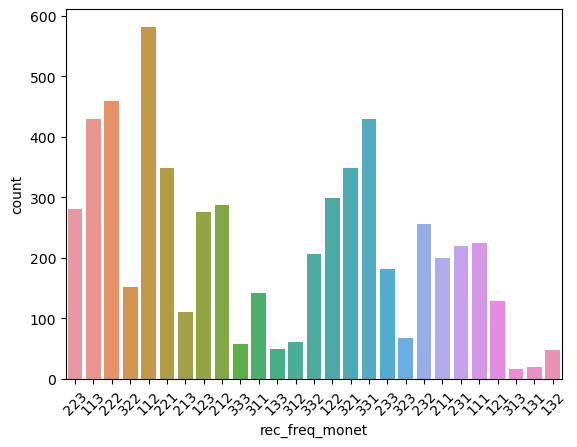

In [64]:
fig=sns.countplot(x='rec_freq_monet', data=all_data)
fig.set_xticklabels(fig.get_xticklabels(),
                   rotation=45 )

In [66]:
from sklearn.cluster import KMeans

In [68]:
rfm= pd.read_csv('rfm.csv')
rfm.columns

Index(['Unnamed: 0', 'Customer ID', 'last_date', 'recency', 'rank_recency',
       'frequency', 'freq_ranking', 'monetary', 'rec_freq_monet'],
      dtype='object')

In [80]:
X = rfm[['frequency', 'monetary', 'recency']]

In [81]:
X

,frequency,monetary,recency
0,34,6463.038333,325
1,222,615.191250,2
2,51,403.880000,75
3,175,1107.172500,18
4,17,334.400000,310
...,...,...,...
5876,938,121.131818,3
5877,28,461.680000,431
5878,12,427.000000,660
5879,67,648.215000,476


In [75]:
km = KMeans(n_clusters=3, n_init=10, max_iter=300, tol=0.0001)

In [82]:
fitting = km.fit_predict(X)

In [83]:
fitting

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [85]:
X['centroids'] = fitting

/tmp/ipykernel_19469/2555898590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['centroids'] = fitting


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

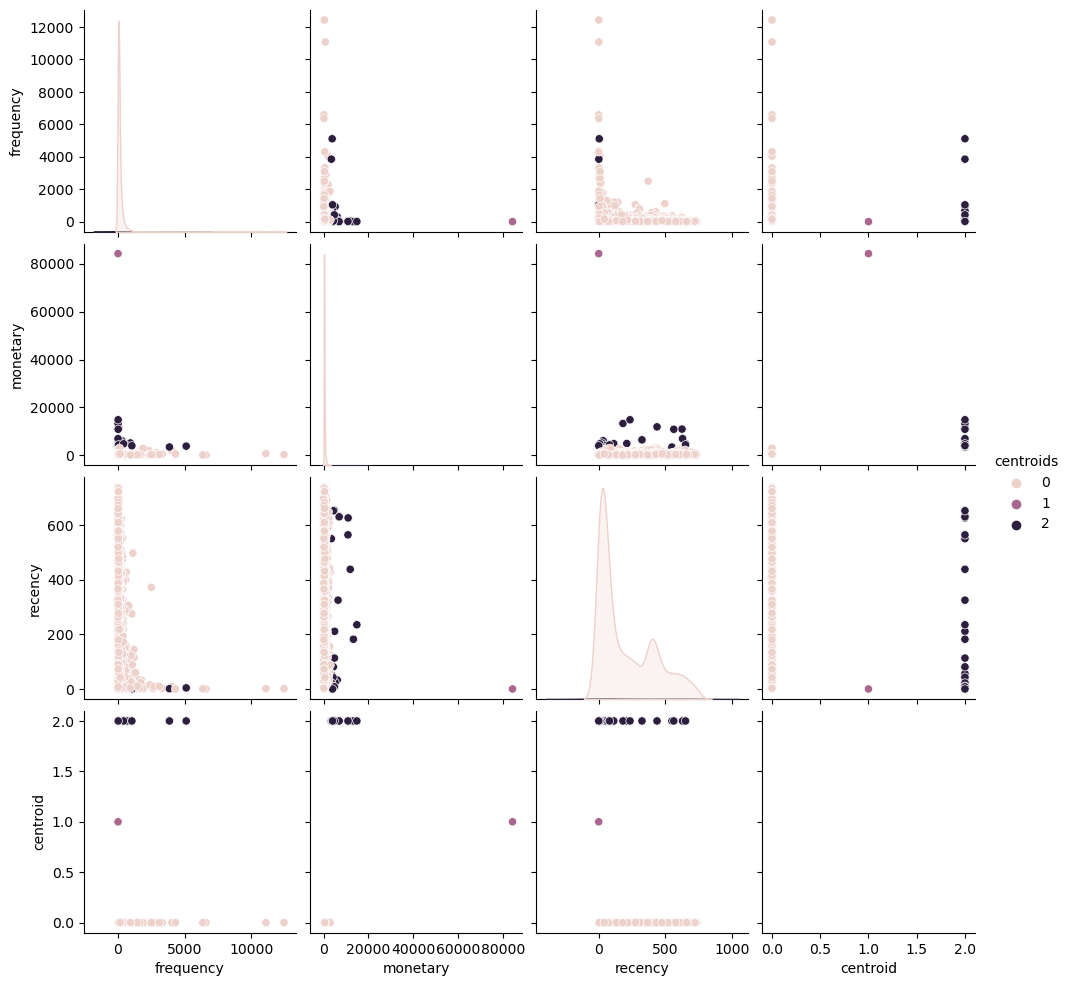

In [86]:

sns.pairplot(data=X,hue='centroids')


In [87]:
sse = []

In [91]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, n_init=10, max_iter=300, tol=0.0001)
    a = kmeans.fit(X)
    sse.append(a.inertia_)

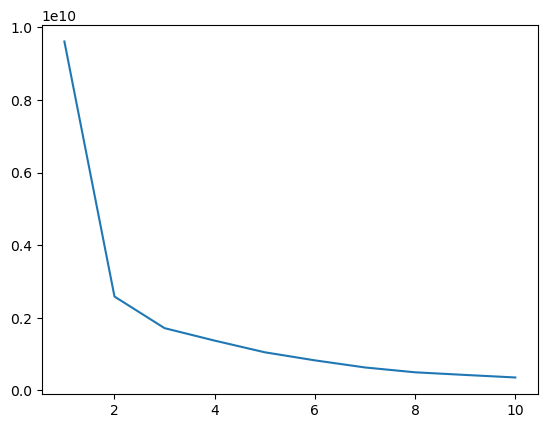

In [92]:
plt.plot(range(1,11), sse)